<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/ResNet_Prediction_HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense,SimpleRNN, LSTM,Dropout,Convolution2D,MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import glob 
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#load data

(160, 160)
[['/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0220.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0219.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0218.jpg'
  ...
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0213.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0212.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0211.jpg']
 ['/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0834.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0833.jpg'
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0832.jpg'
  ...
  '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0827.jpg'
  '/content/gdri

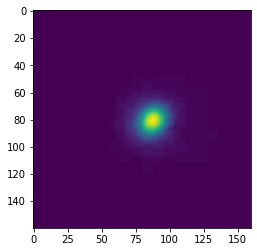

In [ ]:
## ///////// loading the data as DataFrame ////////////
#20220401
#file=pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/train_dataset_2.csv")
#file_test = pd.read_csv(filepath_or_buffer= "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/test_dataset.csv")

#20220603
file_train = pd.read_csv(filepath_or_buffer = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/train_10input_ir_full.csv")
value_train = file_train.values[:2500]
file_test = pd.read_csv(filepath_or_buffer = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/test_10inputs_ir_full.csv")
value_test = file_test.values

## ////////// テスト用とトレーニング用でデータをシャッフルする //////////////
import random #random.shuffle() : shuffle the data of 1D
from sklearn.utils import shuffle #for 2D shuffle

value_train = shuffle(value_train,random_state=42) #random_state = integer ; fix randomness with shuffling
value_test = shuffle(value_test,random_state=42)
#print(value_train.shape)

#value_test = shuffle(value_test, random_state =42)
#print(value_test.shape)

## //////////// Show example /////////
import cv2
import matplotlib.pyplot as plt

img=cv2.imread(value_train[100,1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray)

## ////// making the dataset for train and test //////////

data_train = value_train[:,1:]
label_train =  value_train[:,0]


data_test = value_test[:,1:]
label_test = value_test[:,0]


print(data_test)
print(label_test)

#URL to Image

In [ ]:
def url2image(data):
  image_data = np.zeros((len(data),len(data[1]),160,160))
  for i in range(len(data)-1):
    for j,name in enumerate(data[i]):
      print((len(data),i,j))
      print(name)
      img=cv2.imread(name)
      #print(img)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      image_data[i][j]=gray
  return image_data

In [ ]:
image_train = url2image(data_train)
image_test = url2image(data_test)

ストリーミング出力は最後の 5000 行に切り捨てられました。
(838, 587, 0)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0641.jpg
(838, 587, 1)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0640.jpg
(838, 587, 2)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0639.jpg
(838, 587, 3)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0638.jpg
(838, 587, 4)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0637.jpg
(838, 587, 5)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0636.jpg
(838, 587, 6)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0635.jpg
(838, 587, 7)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0634.jpg
(838, 587, 8)
/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_35_trim/0633.jpg
(838, 587, 9)


#Normalization

In [ ]:
## split data into training data and test data 
image_train = image_train.reshape(len(image_train),10,160,160,1)
image_test = image_test.reshape(len(image_test),10,160,160,1)

#when calculating (dividing process) the type have to be float
image_train = image_train.astype("float32")
image_test = image_test.astype("float32")

#when training, it is convenient if the values are normalized
image_train= image_train/255
image_test = image_test/255

# converting data to float32, especially float32
image_train =np.asarray(image_train).astype(np.float32)
label_train = np.asarray(label_train).astype(np.int)
image_test =np.asarray(image_test).astype(np.float32)
label_test = np.asarray(label_test).astype(np.int)

print("length of label test : ",len(label_test))

#label_train_tensorflow=keras.utils.to_categorical(label_train)  #keras.utils.to_categorical : can see how the result of the judge is like [0.4,0.6] : no-spatter: 40%, spatter : 60%
#label_test_tensorflow=keras.utils.to_categorical(label_test)
#print(image_train)
print(image_train.shape)
print(type(label_train))
#print(label_train_tensorflow)

<ipython-input-7-43b6994a7bf9>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_train = np.asarray(label_train).astype(np.int)


length of label test :  838
(2500, 10, 160, 160, 1)
<class 'numpy.ndarray'>


<ipython-input-7-43b6994a7bf9>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_test = np.asarray(label_test).astype(np.int)


#Scaler to Vector

In [ ]:
# convert label into array(2) [no-spatter, spatter]
def label_vec(label,dim):
  count=0
  lab = np.zeros((len(label),dim))  
  for i in range(len(label)):
    if label[i] == 1: #spatter
      lab[i,1] = 1
      count+=1
    else: #no spatter
      lab[i,0] = 1
  print('spatter label:{}'.format(count))
  return lab

lab_train = label_vec(label_train, 2)
lab_test = label_vec(label_test,2)

print("lab_train.shape ; " , lab_train.shape)
print("lab_test.shape : " , lab_test.shape)

spatter label:1129
spatter label:153
lab_train.shape ;  (2500, 2)
lab_test.shape :  (838, 2)


#Train Model

In [ ]:
##making CNN network : Training  Revised : 2022/08/29

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D,AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import LayerNormalization
from sklearn.metrics import classification_report
from keras.layers import LSTM
from keras.utils import plot_model

##ResNet Model

In [ ]:
from keras.engine.sequential import model_serialization
from tensorflow_datasets.core.dataset_builder import units
from tensorflow import keras
from keras import Input, Model
from keras.layers import TimeDistributed, Activation,BatchNormalization,SeparableConv2D
from keras import layers
from keras import backend as K
from keras.layers.core import Reshape

save_dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/model/0206_1.{epoch:03d}-{val_loss:.2f}.hdf5'
Modelcheckpoint = keras.callbacks.ModelCheckpoint(filepath = save_dir, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

def conv_block(x,num_features,pooling=False):
  residual = x
  conv2d_1 = SeparableConv2D(num_features,(3,3),padding = "same")
  outputs = TimeDistributed(conv2d_1)(x)
  #normalize_1 = BatchNormalization()
  #ouputs = TimeDistributed(normalize_1)(outputs)
  filter_0 = Activation('relu')
  outputs = TimeDistributed(filter_0)(outputs)

  conv2d_2 = SeparableConv2D(num_features,(3,3),padding = "same")
  outputs = TimeDistributed(conv2d_2)(outputs)
  #normalize_2 = BatchNormalization()
  #ouputs = TimeDistributed(normalize_2)(outputs)
  filter_1 = Activation('relu')
  outputs = TimeDistributed(filter_1)(outputs)

  pool_0 = MaxPooling2D((2,2),strides = 2,padding='same')#32*32
  outputs = TimeDistributed(pool_0)(outputs)

  if pooling:#whether Maxpooling layer is or not
    conv_res = SeparableConv2D(num_features,1,strides = 2)
    residual = TimeDistributed(conv_res)(residual)
  else:
    conv_res = SeparableConv2D(num_features,1)
    residual = TimeDistributed(conv_res)(residual)

  outputs = layers.add([outputs,residual])

  return outputs

inputs = Input(shape=(10,160,160,1))
outputs = conv_block(inputs,4,pooling=True) #32*32
outputs = conv_block(outputs,8,pooling=True) #16*16
outputs = conv_block(outputs,16,pooling=True) #8*8
outputs = conv_block(outputs,32,pooling=True) #4*4
#outputs = conv_block(outputs,64,pooling=True) #2*2

"""
conv2d_2 = Convolution2D(32,(5,5))#,padding = "same")
outputs = TimeDistributed(conv2d_2)(outputs)
filter_1 = Activation('relu')
outputs = TimeDistributed(filter_1)(outputs)


pool_1 = MaxPooling2D((2,2),strides=2,padding='same')#14*14
outputs = TimeDistributed(pool_1)(outputs)

conv2d_3 = Convolution2D(32,(3,3))#,padding = "same")
outputs = TimeDistributed(conv2d_3)(outputs)#12*12
filter_2 = Activation('relu')
outputs = TimeDistributed(filter_2)(outputs)
"""

"""
conv2d_4 = Convolution2D(8,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_4)(outputs)
filter_3 = Activation('relu')
outputs = TimeDistributed(filter_3)(outputs)
"""
"""
pool_2 = MaxPooling2D((2,2),strides=2,padding='same')#6*6
outputs = TimeDistributed(pool_2)(outputs)
"""

"""
#For conv output: 1*1*32
conv2d_5 = Convolution2D(32,(5,5))#,padding = "same")
outputs = TimeDistributed(conv2d_5)(outputs)#1*1*32
filter_4 = Activation('relu')
outputs = TimeDistributed(filter_4)(outputs)
"""

"""
conv2d_6 = Convolution2D(16,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_6)(outputs)
filter_5 = Activation('relu')
outputs = TimeDistributed(filter_5)(outputs)


pool_2 = MaxPooling2D(pool_size=(2,2),strides=1)#7*7
outputs = TimeDistributed(pool_2)(outputs)

conv2d_6 = Convolution2D(32,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_6)(outputs)
#filter_6 = Activation('relu')
#outputs = TimeDistributed(filter_6)(outputs)

conv2d_7 = Convolution2D(32,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_7)(outputs)
filter_7 = Activation('relu')
outputs = TimeDistributed(filter_7)(outputs)


pool_3 = MaxPooling2D(pool_size=(2,2),strides=1)#6*6
outputs = TimeDistributed(pool_3)(outputs)

conv2d_8 = Convolution2D(64,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_8)(outputs)
#filter_8 = Activation('relu')
#outputs = TimeDistributed(filter_8)(outputs)

conv2d_9 = Convolution2D(64,(3,3),padding = "same")
outputs = TimeDistributed(conv2d_9)(outputs)
filter_9 = Activation('relu')
outputs = TimeDistributed(filter_9)(outputs)


pool_4 = MaxPooling2D(pool_size=(2,2),strides=1)#5*5
outputs = TimeDistributed(pool_4)(outputs)
"""

print(outputs.shape)
#outputs = TimeDistributed(Flatten())(outputs)#9*32
"""
#outputs = Reshape((outputs.shape[1],outputs.shape[2]*outputs.shape[3]*outputs.shape[4]))(outputs)
print(outputs.shape)
#x = LSTM(100,return_sequences = True)(outputs)
#x = LayerNormalization()(x)
#x = Dropout(0.1)(x)
x = LSTM(100)(outputs)
#x = LayerNormalization()(x)
#x = Dropout(0.1)(x)
#x = Dense(144,activation='relu')(x)
#x = Dropout(0.1)(x)
#x = Dense(16,activation = 'relu')(x)
#x = Dropout(0.1)(x)
output = Dense(2,activation='softmax')(x)
model = Model(inputs = inputs,outputs = output)

"""
"""
#Dense version
outputs = Flatten()(outputs)#9*32
x = Dense(32)(outputs)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x =Dropout(0.3)(x)

x = Dense(32)(outputs)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(32)(outputs)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

x = Dense(32)(outputs)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

x = Dense(32,activation='relu')(x)
x = Dropout(0.05)(x)
"""
x = TimeDistributed(Flatten())(outputs)

x = LSTM(100,recurrent_dropout =0.25)(x)
x = Dropout(0.1)(x)
output = Dense(2,activation='softmax')(x)
model = Model(inputs = inputs,outputs = output)


# Compiling the CNN
opt = keras.optimizers.RMSprop()#Adam()
model.compile(optimizer = opt, 
                  loss="binary_crossentropy",
                  metrics = ['accuracy']) 

(None, 10, 10, 10, 32)


In [ ]:
model.summary()   

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 160, 16  0           []                               
                                0, 1)]                                                            
                                                                                                  
 time_distributed_25 (TimeDistr  (None, 10, 160, 160  17         ['input_2[0][0]']                
 ibuted)                        , 4)                                                              
                                                                                                  
 time_distributed_26 (TimeDistr  (None, 10, 160, 160  0          ['time_distributed_25[0][0]']    
 ibuted)                        , 4)                                                        

In [ ]:
import tensorflow as tf 
def scheduler(epoch, lr=1e-3):
  lr = lr*tf.math.exp(-(epoch/50))
  return lr


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
import tensorflow as tf

#model chechpoint

NUM_EPOCHS = 40
history = model.fit(image_train, lab_train, epochs=NUM_EPOCHS,validation_split = 0.2, batch_size =32,callbacks = [callback,Modelcheckpoint]) 

In [ ]:
#plot vonverging process : 
plt.subplots(figsize = (10,5))
plt.plot(history.history["loss"],label = "Loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.title("Converging state")
plt.xlabel("epoch")
plt.ylabel("binary_crossentropy")
plt.legend()
plt.show()

# Accuracy
plt.subplots(figsize = (10,5))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(loc='best')
plt.show()

#Evaluate model

In [ ]:
# get the newest model file within a directory
import os
def getNewestModel(model, dirname):
    from glob import glob
    target = os.path.join(dirname, '*')
    files = [(f, os.path.getmtime(f)) for f in glob(target)]
    if len(files) == 0:
        return model
    else:
        newestModel = sorted(files, key=lambda files: files[1])[-1]
        model.load_weights(newestModel[0])
        return model

optimal_model = getNewestModel(model, save_dir)

outputs

///////train data//////////////
//////////test data////////////
27/27 [==============================] - 14s 531ms/step
(TP,FN,FP,TN) (0, 153, 3, 682)
838


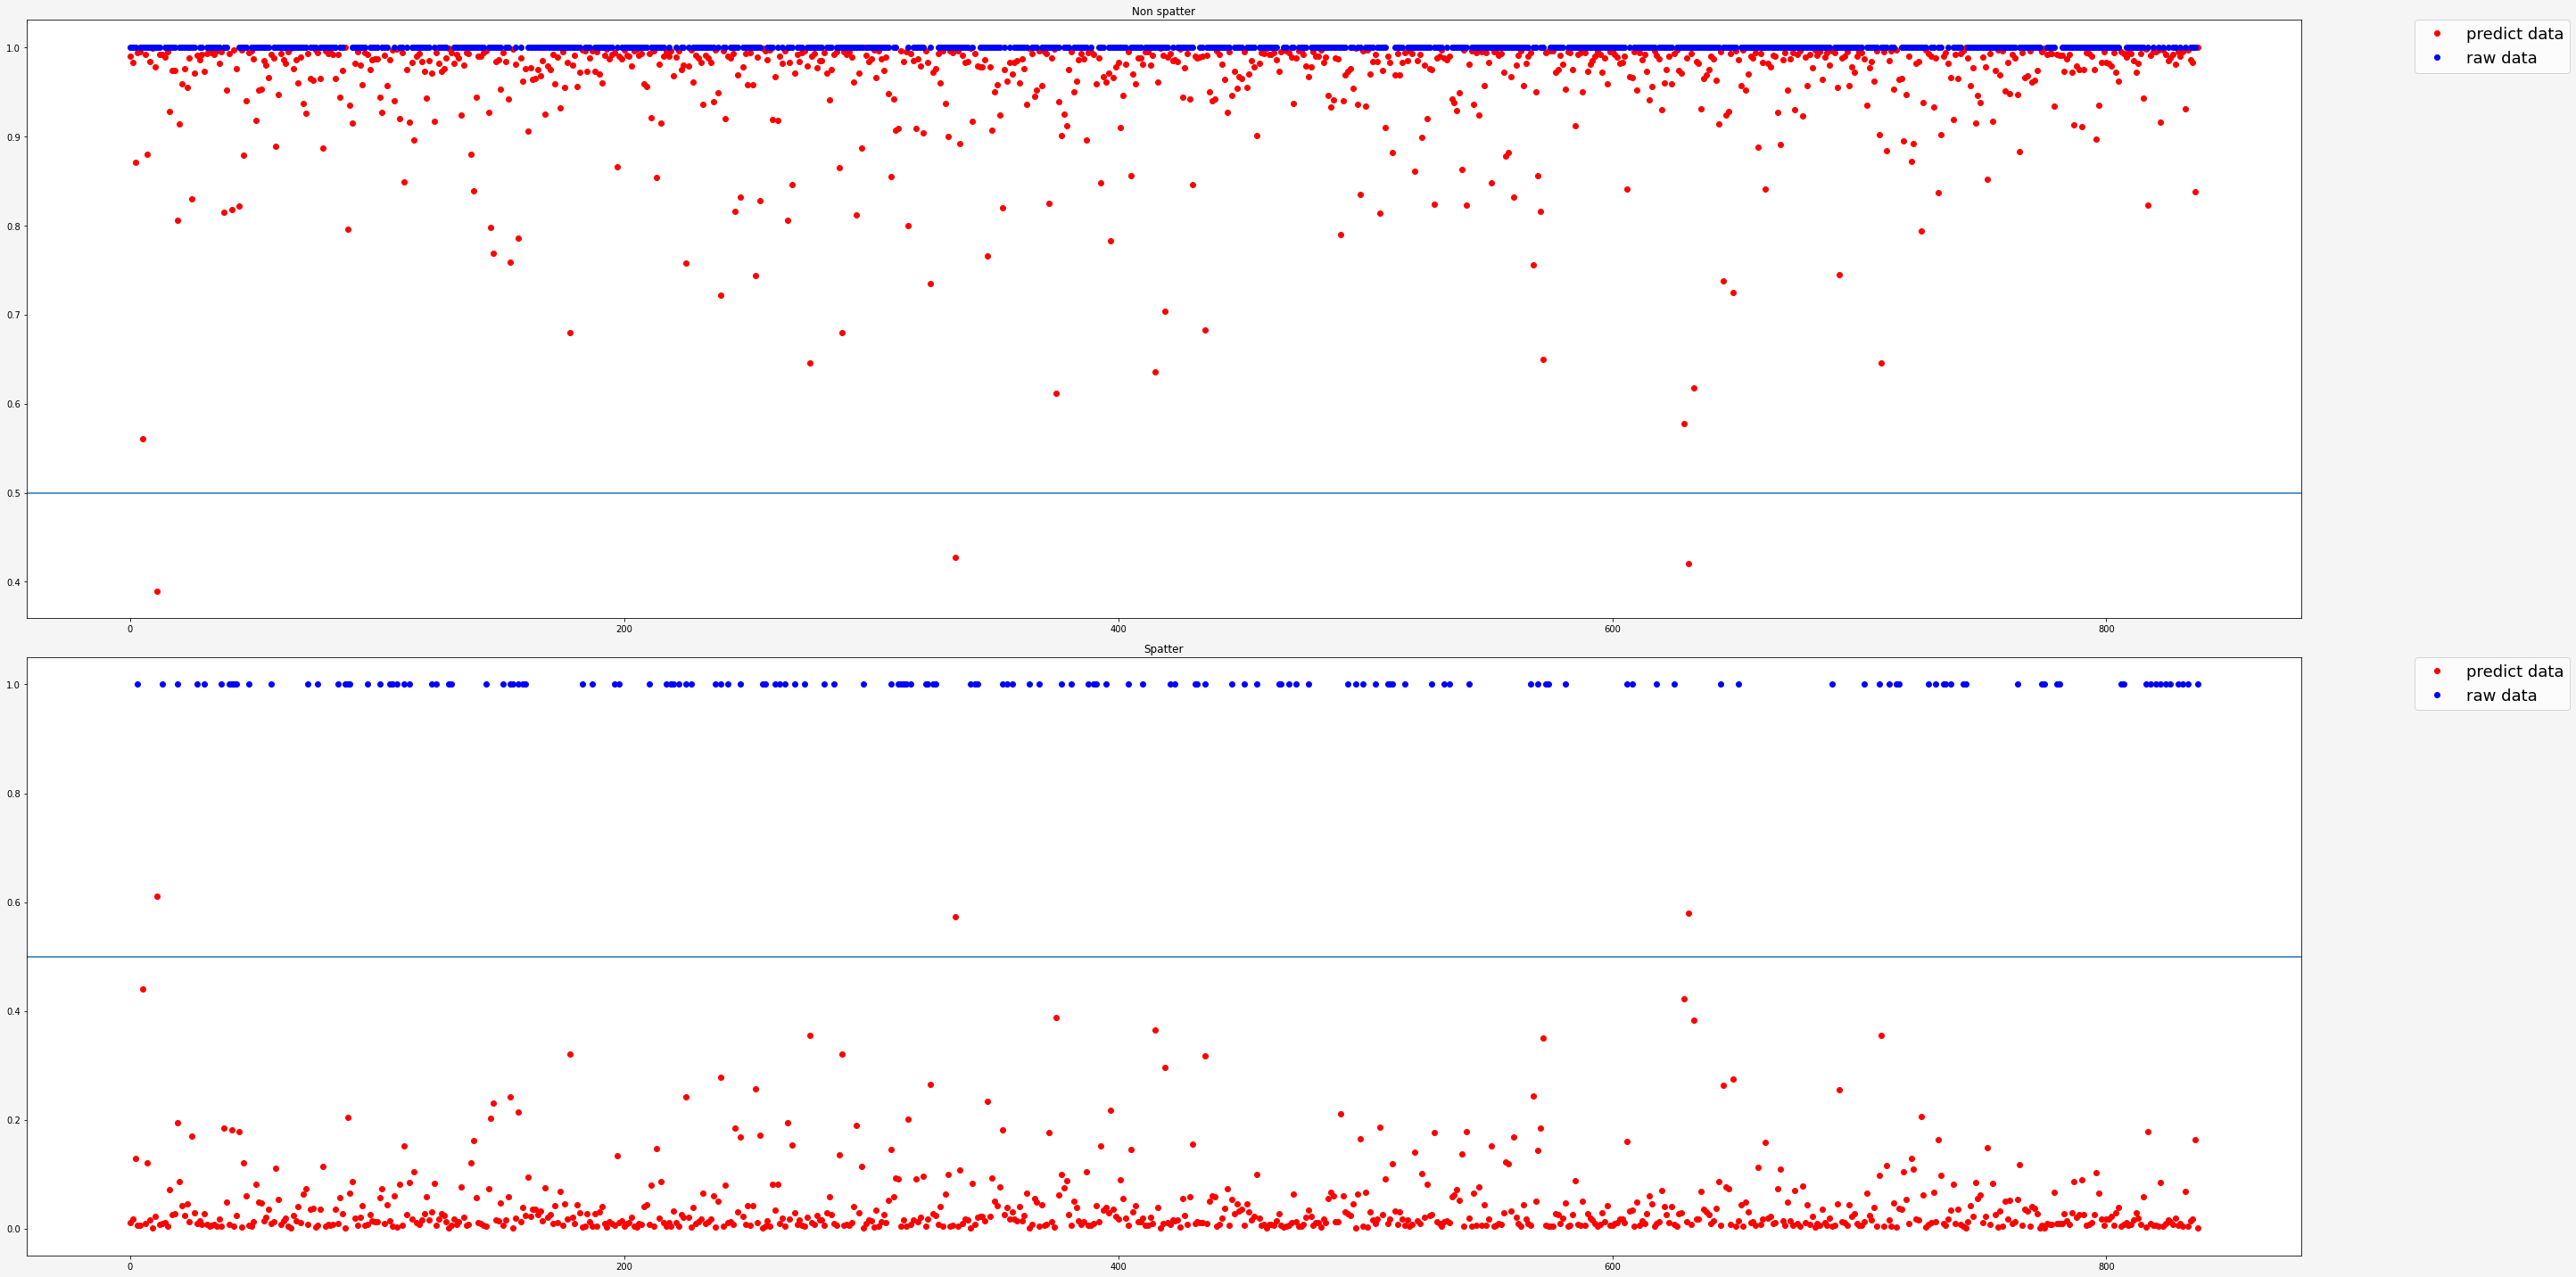

accuracy :  0.8138424821002387
precision: 1e-07
recall: 1e-07
f value: 1e-07


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,precision_score,recall_score

threshold = 0.5

#split label data into a scaler
def vec2scaler(data):
  spatter_label = []
  non_label = []
  for i in range(data.shape[0]):
    if data[i][0] == 1: #non spatter
      non_label.append(1)
      spatter_label.append(None)
    else:#spatter
      non_label.append(None)
      spatter_label.append(1)
  return spatter_label,non_label

def show_outputs(data,label_data):

  predict_data = model.predict(data)
  predict_0 = predict_data[:,0]
  predict_1 = predict_data[:,1]
  #threshold data
  result = np.zeros((predict_data.shape[0],predict_data.shape[1]))
  for i in range(predict_data.shape[0]):
    judge = np.argmax(predict_data[i,:])
    if judge == 0:
      result[i,0] = 1
    else:
      result[i,1] = 1


  spatter_label,non_label = vec2scaler(label_data)
  spatter_predict,non_predict = vec2scaler(result)

  #evaluation parameter
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(spatter_label)):

    if spatter_label[i] == 1:
      if spatter_predict[i] == 1:#TP
        TP +=1
      elif non_predict[i] == 1: #FN
        FN +=1
    elif non_label[i] == 1:
      if spatter_predict[i] == 1:#FP
        FP += 1
      elif non_predict[i] == 1:#TN
        TN += 1

  print("(TP,FN,FP,TN)",(TP,FN,FP,TN))

  all = len(spatter_label)
  print(all)
  accuracy = (TP+TN)/all
  precision = TP/(TP+FP)+1e-7
  recall = TP/(TP+FN)+1e-7
  f_value = 2/(1/precision+1/recall)


  #plot non-spatter data
  fig,ax = plt.subplots(2,1, figsize=(40,20), tight_layout=True, facecolor="whitesmoke")
  #plt.subplot()
  ax[0].plot(predict_0, "r",linestyle = 'None',marker = 'o',label ='predict data')
  ax[0].plot(non_label, "b",linestyle = 'None', marker = 'o', label = 'raw data')
  ax[0].set_title('Non spatter')
  ax[0].axhline(y = threshold)
  ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
  #plt.show()

  #plt.subplot(2,1,2)
  #plt.subplot(figsize = (20,10))
  ax[1].plot(predict_1, "r",linestyle = 'None',marker = 'o',label ='predict data')
  ax[1].plot(spatter_label, "b",linestyle = 'None', marker = 'o', label = 'raw data')
  ax[1].set_title('Spatter')
  ax[1].axhline(y = threshold)
  ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
  plt.show()
  print("accuracy : " ,accuracy)
  print("precision:",precision)
  print("recall:",recall)
  print("f value:",f_value)

print('///////train data//////////////')
#show_outputs(image_train,lab_train)
print('//////////test data////////////')
show_outputs(image_test,lab_test)

#Plot the transition of metrics with Threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,precision_score,recall_score

threshold = 0.5

#split label data into a scaler
def vec2scaler(data):
  spatter_label = []
  non_label = []
  for i in range(data.shape[0]):
    if data[i][0] == 1: #non spatter
      non_label.append(1)
      spatter_label.append(None)
    else:#spatter
      non_label.append(None)
      spatter_label.append(1)
  return spatter_label,non_label

def metrics_change(data,label_data,threshold):
  Spatter = []
  predict_data = model.predict(data)

  #decide spatter or not according to threshold
  for i in range(predict_data.shape[0]):
    if predict_data[i,1] >= threshold:
      Spatter.append(1)
    else :
      Spatter.append(0)

  spatter_label,non_label = vec2scaler(label_data)

  #evaluation parameter
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(spatter_label)):

    if spatter_label[i] == 1:
      if Spatter[i] == 1:#TP
        TP +=1
      elif Spatter[i] == 0: #FN
        FN +=1
    elif non_label[i] == 1:
      if Spatter[i] == 1:#FP
        FP += 1
      elif Spatter[i] == 1:#TN
        TN += 1

  print("(TP,FN,FP,TN)",(TP,FN,FP,TN))

  all = len(spatter_label)
  print(all)
  accuracy = (TP+TN)/all
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  if precision == 0 or recall == None:
    f_value = None
  else:
    f_value = 2/(1/precision+1/recall)
  
  return accuracy, precision, recall,f_value

In [ ]:
import matplotlib.pyplot as plt

def frange(start, end , step):
    if step == 0:
        raise ValueError('step must not be zero')

    start = float(start)
    end = float(end)
    step = float(step)

    # range関数と同様な振る舞いにする
    if abs(step) > abs(start - end):
        return [start]
    if step > 0 and end - start < 0:
        return []
    elif step < 0 and end - start > 0:
        return []

    exp = len(str(step).split('.')[1])  # 丸める際に使用する桁数
    result = [start]
    val = start
    if step > 0:
        while (val := round(val + step, exp)) < end:
            result.append(val)
    else:
        while (val := round(val + step, exp)) > end:
            result.append(val)
    return result

Accuracy = []
Precision = []
Recall = []
F_value = []
Threshold = []

for threshold in frange(0.0,1.0,0.05):
  accuracy,precision,recall,f_value = metric_change(image_test,lab_test,threshold)
  Threshold.append(threshold)
  Accuracy.append(accuracy)
  Precision.append(precision)
  Recall.append(recall)
  F_value.append(f_value)

plt.subplots(figsize=(7,7))
plt.plot(Threshold,Accuracy,color ='b',label = 'Accuracy')
plt.plot(Threshold,Precision,color ='y',label = 'Precision')
plt.plot(Threshold,Recall,color ='g',label = 'Recall')
plt.plot(Threshold,F_value,linewidth = 3,color ='r',label = 'F value')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import random

def frange(start, end , step):
    if step == 0:
        raise ValueError('step must not be zero')

    start = float(start)
    end = float(end)
    step = float(step)

    # range関数と同様な振る舞いにする
    if abs(step) > abs(start - end):
        return [start]
    if step > 0 and end - start < 0:
        return []
    elif step < 0 and end - start > 0:
        return []

    exp = len(str(step).split('.')[1])  # 丸める際に使用する桁数
    result = [start]
    val = start
    if step > 0:
        while (val := round(val + step, exp)) < end:
            result.append(val)
    else:
        while (val := round(val + step, exp)) > end:
            result.append(val)
    return result

Accuracy = []
Precision = []
Recall = []
F_value = []
Threshold = []
for threshold in frange(0.0,1.0,0.05):
  Threshold.append(threshold)
  Accuracy.append(random.random())
  Precision.append(random.random())
  Recall.append(random.random())
  F_value.append(random.random())


plt.subplots(figsize=(7,7))
plt.plot(Threshold,Accuracy,color ='b',label = 'Accuracy')
plt.plot(Threshold,Precision,color ='y',label = 'Precision')
plt.plot(Threshold,Recall,color ='g',label = 'Recall')
plt.plot(Threshold,F_value,linewidth = 3,color ='r',label = 'F value')
plt.legend()
plt.show

#model structure

In [ ]:
model.summary()

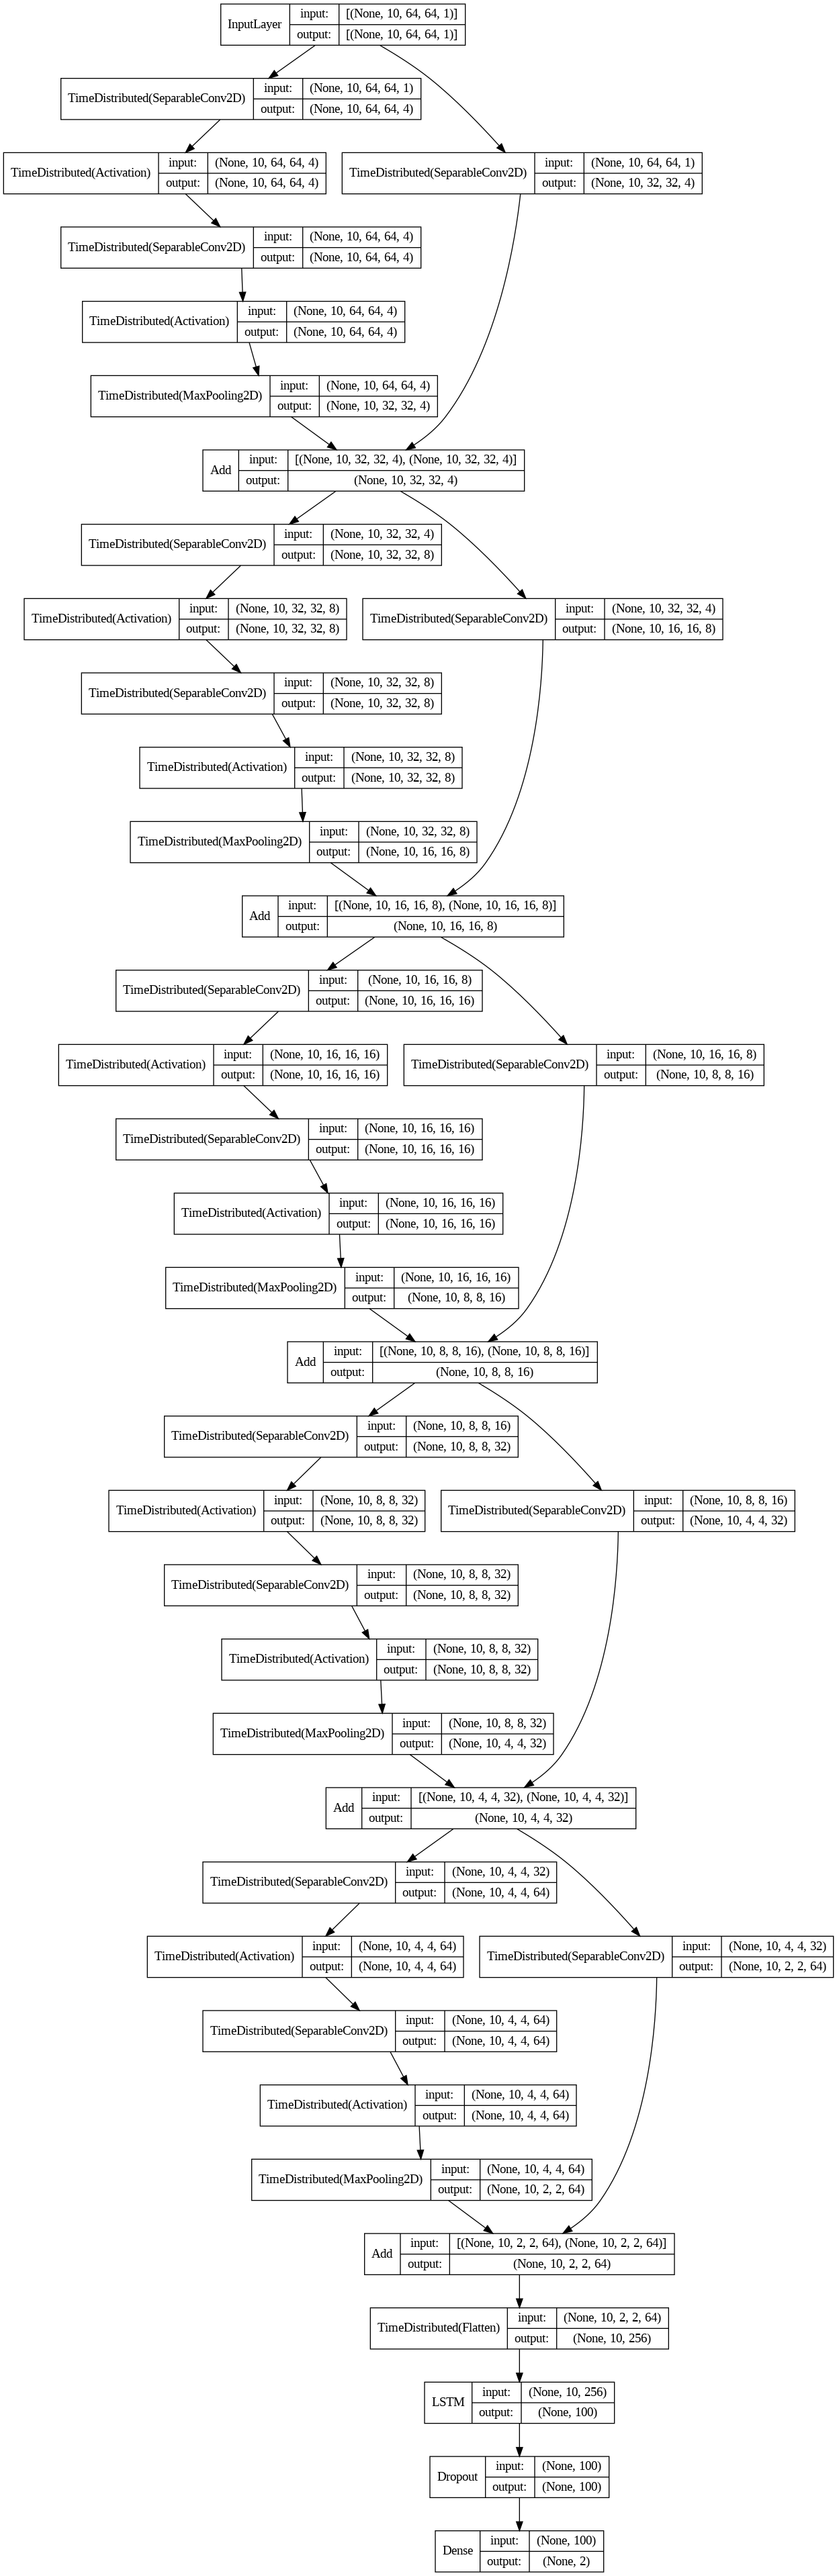

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True,show_layer_names = False)

#make heatmap

define model

In [ ]:
last_conv_layer_name = 'time_distributed_7' 
classifier_layer_names = ['time_distributed_8','flatten','dense_3','batch_normalization_3','activation_6','dense_4','dense_5']
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs,last_conv_layer.output)

adapt classifer for last conv layer

In [ ]:
classifier_input = keras.Input(shape = last_conv_layer.output.shape[1:])
x = classifier_input
#make model
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input,x)

get gradients of highly predicted class

In [ ]:
import tensorflow as tf

img = image_train[2]
img = np.expand_dims(img,axis=0)
with tf.GradientTape() as tape:

  #calculate last conv layer's activation and enroll for GradientTape
  last_conv_layer_output = last_conv_layer_model(img) #(1,9,7.7,32)
  print(last_conv_layer_output.shape)
  tape.watch(last_conv_layer_output)

  #get a channel of most highly predicted class
  preds = classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:,top_pred_index] #tensor shape=(1,)

#last class gradient based on last conv layer as input
grads = tape.gradient(top_class_channel,last_conv_layer_output) #(1,9,7,7,32)

(1, 10, 10, 10, 4)


weighting each channel

In [ ]:
Heatmap = np.zeros((last_conv_layer_output.shape[1],last_conv_layer_output.shape[2],last_conv_layer_output.shape[3]))
for i in range(grads.shape[1]):
  grads_tmp = grads[0,i,:,:,:]
  #averaging for each filter
  pooled_grads = tf.reduce_mean(grads_tmp,axis=(0,1)).numpy()
  print(pooled_grads.shape)#(1,9)
  last_conv_layer_output_tmp = last_conv_layer_output.numpy()[0][i]
  print(last_conv_layer_output_tmp.shape)#

  #multiply weights by each filter
  for j in range(pooled_grads.shape[-1]):
    last_conv_layer_output_tmp[:,:,j] *= pooled_grads[j]

  #average for each filter
  heatmap = np.mean(last_conv_layer_output_tmp,axis = -1) #all
  print(heatmap.shape)
  Heatmap[i,:,:] = heatmap

(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)
(4,)
(10, 10, 4)
(10, 10)


normalization of heatmap for 0~1

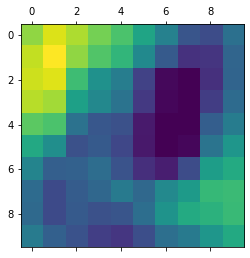

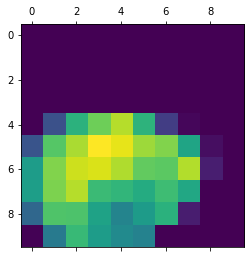

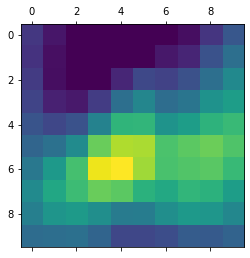

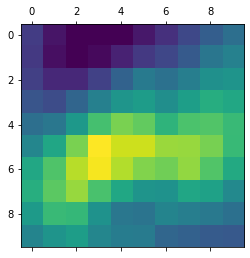

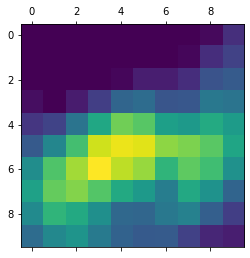

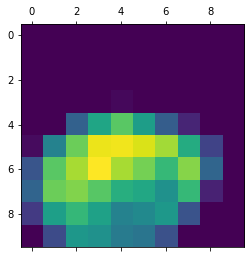

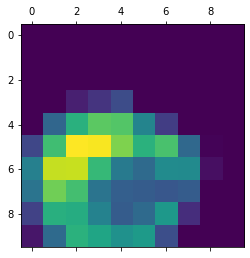

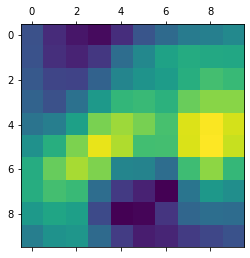

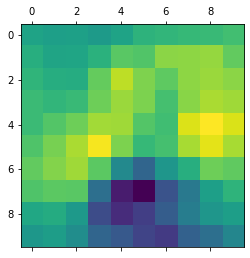

In [ ]:
for i in range(9):
  Heatmap[i,:,:] = np.maximum(Heatmap[i,:,:],0)
  Heatmap[i,:,:] = Heatmap[i,:,:]/np.max(Heatmap[i,:,:])
  plt.matshow(Heatmap[i,:,:])

superimpose heatmap to original image

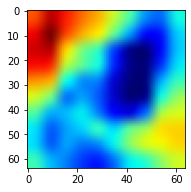

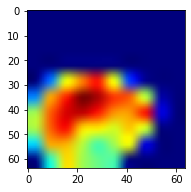

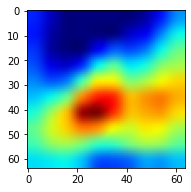

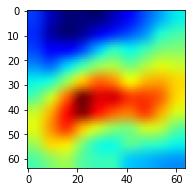

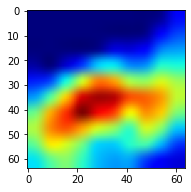

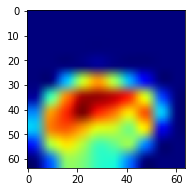

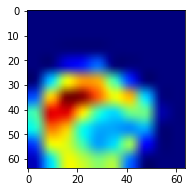

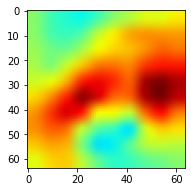

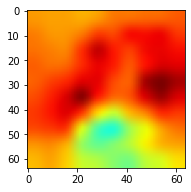

In [ ]:
import matplotlib.cm as cm
from google.colab.patches import cv2_imshow

for i in range(9):
  img = image_train[2][i]
  img = keras.utils.img_to_array(img)
  
  heatmap = Heatmap[i,:,:]
  heatmap = np.uint8(255*heatmap)
  #coloring heatmap
  jet = cm.get_cmap('jet')
  jet_colors = jet(np.arange(256))[:,:3]
  jet_heatmap = jet_colors[heatmap]

  #make img with heatmap
  jet_heatmap = keras.utils.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1],img.shape[0])) #order is different betweendimage and array
  jet_heatmap = keras.utils.img_to_array(jet_heatmap)

  #transparency rate = 40%
  superimposed_img = jet_heatmap*0.1+img
  superimposed_img = keras.utils.array_to_img(superimposed_img)
  plt.figure(figsize=(30,3))
  plt.subplot(1,9,i+1)
  plt.imshow(superimposed_img)
  #save_path="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/%02d.jpg"%(i+1)
  #superimposed_img.save(save_path)

